In [30]:
import pandas as pd
import anndata as ad
import scanpy as sc
import numpy as np
import seaborn as sns
import random
import pickle as pkl

from matplotlib_venn import venn3
import matplotlib.pyplot as plt

In [5]:
adata = ad.read_h5ad("../../data/sciplex_qc_ann.h5ad")

In [6]:
adata

AnnData object with n_obs × n_vars = 401917 × 27544
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'SMILES', 'fmfp', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'drug_celltype_dose', 'match_index'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

## Random gene subset

In [11]:
def save_adata_random(adata_qc_path, adata_out_path, n_genes=2000):
    adata = ad.read_h5ad(adata_qc_path)
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    
    genes_random = random.sample(list(adata.var_names), n_genes)
    adata = adata[:, adata.var_names.isin(genes_random)].copy()
    adata.write_h5ad(adata_out_path)

In [12]:
save_adata_random("../../data/sciplex_qc_ann.h5ad", "../../data/feature_selection/sciplex_rand.h5ad")

## HVG - Seurat

In [17]:
def save_adata_hvg_seurat(adata_qc_path, adata_out_path, n_genes=2000):
    adata = ad.read_h5ad(adata_qc_path)
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=n_genes)
    adata = adata[:, adata.var['highly_variable']].copy()
    adata.write_h5ad(adata_out_path)

In [18]:
save_adata_hvg_seurat("../../data/sciplex_qc_ann.h5ad", "../../data/feature_selection/sciplex_seurat.h5ad")

## HVG - Seurat V3

In [21]:
def save_adata_hvg_seurat_v3(adata_qc_path, adata_out_path, n_genes=2000):
    adata = ad.read_h5ad(adata_qc_path)
    sc.pp.highly_variable_genes(adata, flavor='seurat_v3', n_top_genes=n_genes)
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    adata = adata[:, adata.var['highly_variable']].copy()
    adata.write_h5ad(adata_out_path)

In [22]:
save_adata_hvg_seurat_v3("../../data/sciplex_qc_ann.h5ad", "../../data/feature_selection/sciplex_seurat_v3.h5ad")

## HVG - Cell Ranger

In [26]:
def save_adata_hvg_cellranger(adata_qc_path, adata_out_path, n_genes=2000):
    adata = ad.read_h5ad(adata_qc_path)
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=n_genes)
    adata = adata[:, adata.var['highly_variable']].copy()
    adata.write_h5ad(adata_out_path)

In [27]:
save_adata_hvg_cellranger("../../data/sciplex_qc_ann.h5ad", "../../data/feature_selection/sciplex_cellranger.h5ad")

## Plots

In [28]:
adata_rand = ad.read_h5ad("../../data/feature_selection/sciplex_rand.h5ad")
adata_seurat = ad.read_h5ad("../../data/feature_selection/sciplex_seurat.h5ad")
adata_seuratv3 = ad.read_h5ad("../../data/feature_selection/sciplex_seurat_v3.h5ad")
adata_cellranger = ad.read_h5ad("../../data/feature_selection/sciplex_cellranger.h5ad")

In [29]:
# Convert to sets
genes_rand = set(list(adata_rand.var_names))
genes_seurat = set(list(adata_seurat.var_names))
genes_seuratv3 = set(list(adata_seuratv3.var_names))
genes_cellranger = set(list(adata_cellranger.var_names))

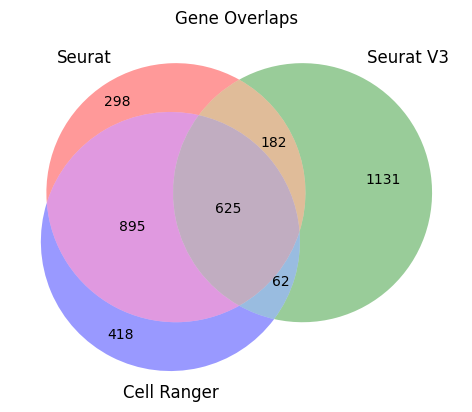

In [31]:
# Create the Venn diagram
venn3([genes_seurat, genes_seuratv3, genes_cellranger], ('Seurat', 'Seurat V3', 'Cell Ranger'))
plt.title("Gene Overlaps")
plt.show()